In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
np.random.seed(0)
X = np.random.rand(100,1)
y = 2 * (4 ** X) + np.random.rand(100,1)

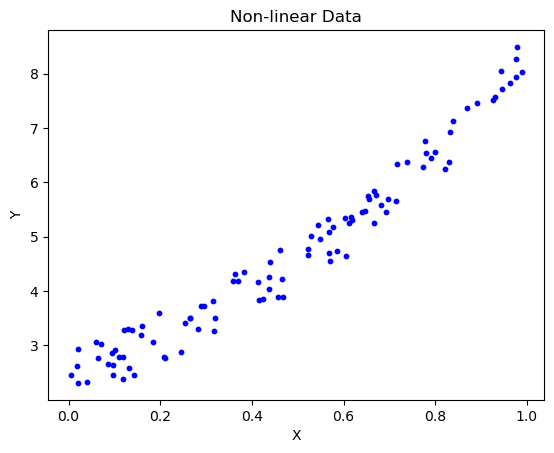

In [62]:
plt.scatter(X, y, s=10, color='blue', marker='o')
plt.title('Non-linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Training the algorithm

In [63]:
#Loss Function (MSE)
def loss(y,y_pred):
    return np.mean((y_pred - y)**2)

#Calculating Gradients
def gradients(X, y, y_pred):
    n_samples, n_features = X.shape
    
    dw = (1/n_samples)*np.dot(X.T,(y_pred - y))
    db = (1/n_samples)*np.sum(y_pred - y)
    
    return dw,db

#Copy the values from X to t and as per the degree provided in the list find it exponent
#example: degree=[3] then X -> X^2 -> X^3
def x_transform(X, degrees):
    t = X.copy()
    
    for i in degrees:
        X = np.append(X, t**i, axis=1)
    return X

#Fit the model
def fit(X, y, degrees, n_iters, lr):
    x = x_transform(X, degrees)
    n_samples, n_features = x.shape
    
    w = np.zeros((n_features,1))
    b = 0
    
    #Reshaping y to have one column and as many rows as needed
    y = y.reshape(n_samples,1)
    
    #Storing the losses
    losses = [] 
    
    for n_iter in range(n_iters):
        y_pred = np.dot(x, w) + b
        
        dw, db = gradients(x, y, y_pred)
        
        w = w - lr*dw
        b = b - lr*db
        
        l = loss(y, y_pred)
        losses.append(l)
        print('Iteration',n_iter,'Loss:',l)
        
    return w,b,losses

def predict(X, w, b, degrees):
    x1 = x_transform(X, degrees)
    y_pred = np.dot(x1, w) + b
    return y_pred

### Fitting the model and calculating the loss

In [64]:
w, b, l = fit(X, y, degrees=[2], n_iters=10000, lr=0.01)

Iteration 0 Loss: 24.84311984444589
Iteration 1 Loss: 24.188446436532473
Iteration 2 Loss: 23.551413590854782
Iteration 3 Loss: 22.931545139271403
Iteration 4 Loss: 22.328377768784616
Iteration 5 Loss: 21.741460674484248
Iteration 6 Loss: 21.170355221861087
Iteration 7 Loss: 20.61463461823721
Iteration 8 Loss: 20.073883593066604
Iteration 9 Loss: 19.547698086867083
Iteration 10 Loss: 19.035684948550113
Iteration 11 Loss: 18.537461640922075
Iteration 12 Loss: 18.052655954136167
Iteration 13 Loss: 17.58090572688045
Iteration 14 Loss: 17.121858575093093
Iteration 15 Loss: 16.675171628001625
Iteration 16 Loss: 16.240511271288455
Iteration 17 Loss: 15.81755289719029
Iteration 18 Loss: 15.405980661344223
Iteration 19 Loss: 15.00548724619843
Iteration 20 Loss: 14.615773630810063
Iteration 21 Loss: 14.236548866858135
Iteration 22 Loss: 13.867529860703442
Iteration 23 Loss: 13.508441161332325
Iteration 24 Loss: 13.159014754025424
Iteration 25 Loss: 12.818989859596844
Iteration 26 Loss: 12.48811

### Plotting the Predictions 

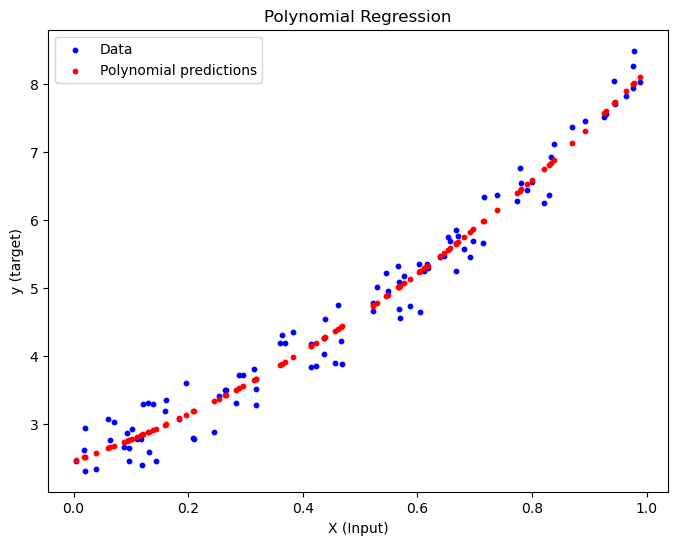

In [56]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', marker='o', s = 10)
plt.scatter(X, predict(X, w, b, [2]), color='red', marker='o', s = 10)
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X (Input)')
plt.ylabel('y (target)')
plt.title('Polynomial Regression')
plt.show()

In [50]:
def r2_score(y, y_pred):
    return 1 - (np.sum((np.array(y_pred)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))
r2_score(y, predict(X, w, b, [2]))

0.9725751232289634

**An R2 score of 0.97 indicates that 97% of the variance in our dependent variable is explained by our independent variables**

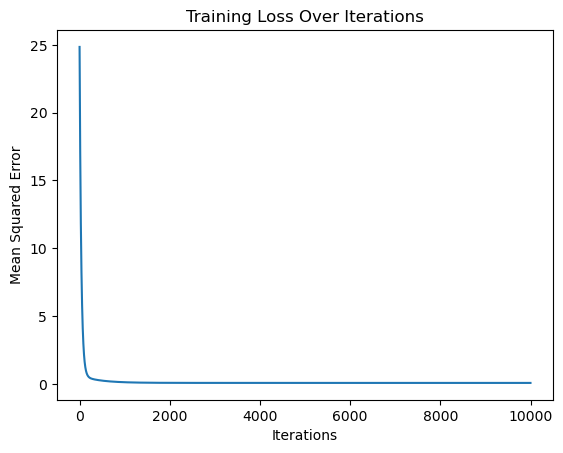

In [59]:
plt.plot(l)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Iterations')
plt.show()